# Feature engineering

## Jakub Ševcech

# Obsah

> ## Praca s casom a datumami
> ## Zoskupovanie viacerych pozorovani
> ## Numericke atributy
>> ### Normalizacia
>> ### Vyrabanie atributov kombinovanim

# Suvisiace temy, ktore dnes nestihame

> ## Transformacia kategorickych atributov na numericke
> ## Vyber atributov
> ## Nevyvazene datasety

Vycerpavajuci zoznam mnozstva veci, co sa da robit na pripravu dat a na feature engineering najdete tu: http://www.datasciencecentral.com/profiles/blogs/feature-engineering-data-scientist-s-secret-sauce-1

Nanestastie je to len zoznam

Celkom pekny zoznam krokov a aj metod je tu: http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

Zopar najcastejsie pouzivanych veci z toho vyberiem a ukazem na co je to dobre

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.rcParams['figure.figsize'] = 9, 6
from IPython.display import Image

# Najskor sa skuste pozriet do dat a skusit tam najst nejake vlastnosti sami.

# Napriklad rozbite atributy, kde sa v jednom nachadza viacero hodnot.
Priklad na datach o potopeni Titanicu
https://www.kaggle.com/c/titanic

In [2]:
titanic = pd.read_csv('titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
import re
titanic.Name.apply(lambda x: re.split('[,.]', x)).head(10)

0                          [Braund,  Mr,  Owen Harris]
1    [Cumings,  Mrs,  John Bradley (Florence Briggs...
2                           [Heikkinen,  Miss,  Laina]
3     [Futrelle,  Mrs,  Jacques Heath (Lily May Peel)]
4                         [Allen,  Mr,  William Henry]
5                                 [Moran,  Mr,  James]
6                          [McCarthy,  Mr,  Timothy J]
7                   [Palsson,  Master,  Gosta Leonard]
8    [Johnson,  Mrs,  Oscar W (Elisabeth Vilhelmina...
9              [Nasser,  Mrs,  Nicholas (Adele Achem)]
Name: Name, dtype: object

In [4]:
titanic.Name.apply(lambda x: re.split('\s*[,.]\s*', x)).head(10)

0                            [Braund, Mr, Owen Harris]
1    [Cumings, Mrs, John Bradley (Florence Briggs T...
2                             [Heikkinen, Miss, Laina]
3       [Futrelle, Mrs, Jacques Heath (Lily May Peel)]
4                           [Allen, Mr, William Henry]
5                                   [Moran, Mr, James]
6                            [McCarthy, Mr, Timothy J]
7                     [Palsson, Master, Gosta Leonard]
8    [Johnson, Mrs, Oscar W (Elisabeth Vilhelmina B...
9                [Nasser, Mrs, Nicholas (Adele Achem)]
Name: Name, dtype: object

In [5]:
set(titanic.Name.apply(lambda x: re.split('\s*[,.]\s*', x)[1]))

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [8]:
titanic['title'] = titanic.Name.apply(lambda x: re.split('\s*[,.]\s*', x)[1])
titanic.title.head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: title, dtype: object

In [9]:
titanic.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Jonkheer          1
Ms                1
Sir               1
Capt              1
Don               1
Mme               1
the Countess      1
Lady              1
Name: title, dtype: int64

# Teraz je tu zopar titulov, ktorych pocty su fakt zanedbatelne a ten model by sa ich tazko ucil. Hrozilo by praveze, ze sa preuci

# Chcelo by to aby sa pospajali dohromady.

Napriklad Mlle = Mademoiselle = Miss

In [10]:
titanic.loc[titanic.title == 'Mlle', 'title'] = 'Miss'
titanic.loc[titanic.title == 'Mme', 'title'] = 'Mrs'
titanic.loc[titanic.title.isin(['Capt', 'Don', 'Major']), 'title'] = 'Sir'
titanic.loc[titanic.title.isin(['Dona', 'Lady', 'the Countess', 'Jonkheer']), 'title'] = 'Lady'

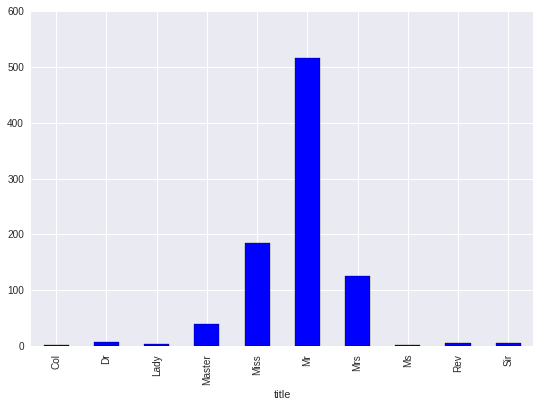

In [11]:
titanic.groupby('title').size().plot(kind='bar')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAhwAAAGWCAYAAAAzPVpfAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzt3X1QlXX+//EXHG5K0NUDB0a8SXNLyjwOmI2kjmJ5zJzNNdE0pdJudkwpW9L1rnKzHW/axmyUrFndJG0JZcbF1kStdLfEu8UodmozRddVAwQUQRTF8/vDn3xzNTkH+Jy7no+ZZvRwzrnenxB9nuu6znWCnE6nUwAAAAYFe3sAAAAQ+AgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMaFuHKn3NxcrVy5UiEhIXruuefUvXt3TZ8+XU6nUzabTYsXL1ZoaKhyc3OVmZkpi8Wi0aNHKyUlxfT8AADADwQ1dh2OU6dO6ZFHHtGGDRtUU1Ojt956SxcuXFBycrIcDoeWLFmi9u3ba8SIERo5cqRycnIUEhKilJQUrV27Vm3atPHUWgAAgI9q9JDKzp071a9fP918882Kjo7Wq6++qj179ig5OVmSlJycrJ07d6qwsFB2u10REREKDw9XYmKiCgoKjC8AAAD4vkYPqRw7dky1tbWaPHmyzpw5oylTpujcuXMKDQ2VJEVFRam0tFTl5eWyWq0Nj7NarSorKzM3OQAA8BuNBofT6dSpU6e0fPlyHTt2TI899ph+fBTmp47IuHLF9IsX6xUSYnFjXAAA4I8aDY7o6GglJCQoODhYnTp1UkREhEJCQlRXV6ewsDCVlJQoNjZWMTExV+3RKCkpUUJCwg2fu7LybPNX0AibrbXKys4Y345pgbIOKXDWwjp8S6CsQwqctbAO3+KJddhsrX/ya42ew9GvXz/t3r1bTqdTlZWVOnv2rJKSkrR582ZJUl5engYMGCC73a6ioiJVV1erpqZG+/fvV+/evVtuFQAAwG81uocjNjZWQ4cO1ZgxYxQUFKSXX35Zd911l2bMmKHs7GzFxcVp5MiRslgsSk9P16RJkxQcHKy0tDRFRkZ6Yg0AAMDHNfq2WJM8sYuKXWG+J1DWwjp8S6CsQwqctbAO3+Lzh1QAAACai+AAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwLsTbAwDA/6qvr9fhw4fcekxlZaQqKqrdekyXLrfKYrG49RgATUNwAPA5hw8fUlJSmaSubj4y0o37Fis/X+rW7TY3twGgKQgOAD6qq6TbDW/DvT0iAJqOczgAAIBxBAcAADCO4AAAAMY1eg7Hnj179Pzzz+u2226T0+lU9+7d9dRTT2n69OlyOp2y2WxavHixQkNDlZubq8zMTFksFo0ePVopKSmeWAMAAPBxLp00es8992jp0qUNv581a5ZSU1PlcDi0ZMkS5eTkaMSIEcrIyFBOTo5CQkKUkpIih8OhNm3aGBseAAD4B5cOqTidzqt+v2fPHiUnJ0uSkpOTtXPnThUWFsputysiIkLh4eFKTExUQUFBy08MAAD8jkt7OA4ePKhnn31Wp0+f1pQpU3Tu3DmFhoZKkqKiolRaWqry8nJZrdaGx1itVpWVlZmZGgAA+JVGg+OWW27R1KlTNWzYMB09elSPPfaYLl682PD1/9370djtP9auXSuFhJi/yp/N1tr4NjwhUNYhBc5aWIcZlZXuXMCr6azWSJ9b+xW+Ope7WIdv8eY6Gg2O2NhYDRs2TJLUqVMnRUdHq6ioSHV1dQoLC1NJSYliY2MVExNz1R6NkpISJSQk3PC5KyvPNnP8xtlsrVVWdsb4dkwLlHVIgbMW1mHO5UuUm4+Oiopqn1u75Jvfk6ZgHb7FE+u4UdA0eg7Hxo0btWzZMklSeXm5ysvL9fDDD2vz5s2SpLy8PA0YMEB2u11FRUWqrq5WTU2N9u/fr969e7fQEgAAgD9rdA/H4MGDlZ6ernHjxsnpdOr3v/+94uPj9bvf/U7Z2dmKi4vTyJEjZbFYlJ6erkmTJik4OFhpaWmKjPTMblEAAODbGg2OiIgIrVix4prbV61adc1tDodDDoejZSYDAAABgyuNAgAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiCAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiCAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiCAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiCAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiCAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiXguP8+fMaMmSINmzYoB9++EGpqamaMGGCXnjhBV24cEGSlJubq5SUFD3yyCNav3690aEBAIB/cSk4MjIy1LZtW0nS0qVLlZqaqjVr1qhz587KyclRbW2tMjIytHr1amVmZmr16tWqqqoyOjgAAPAfjQbHoUOHVFxcrIEDB8rpdGrv3r1KTk6WJCUnJ2vnzp0qLCyU3W5XRESEwsPDlZiYqIKCAuPDAwAA/9BocCxevFgzZ85s+H1tba1CQ0MlSVFRUSotLVV5ebmsVmvDfaxWq8rKygyMCwAA/FHIjb64YcMG9enTR3Fxcdf9utPpdOv2/9WuXSuFhFhcum9z2GytjW/DEwJlHVLgrIV1mFFZGemR7VitkT639it8dS53sQ7f4s113DA4duzYof/+97/asmWLSkpKFBoaqlatWqmurk5hYWEqKSlRbGysYmJirtqjUVJSooSEhEY3Xll5tvkraITN1lplZWeMb8e0QFmHFDhrYR3mVFRUSzIfHRUV1T63dsk3vydNwTp8iyfWcaOguWFwLFmypOHXy5YtU8eOHVVQUKDNmzfroYceUl5engYMGCC73a65c+equrpaQUFB2r9/v+bMmdNyKwAAAH7thsFxPc8995xmzJih7OxsxcXFaeTIkbJYLEpPT9ekSZMUHBystLQ0RUZ6ZpcoAADwfS4Hx9SpUxt+vWrVqmu+7nA45HA4WmYqAAAQULjSKAAAMI7gAAAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwjOAAAgHEEBwAAMI7gAAAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwjOAAAgHEEBwAAMI7gAAAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwjOAAAgHEEBwAAMI7gAAAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwjOAAAgHEEBwAAMI7gAAAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwjOAAAgHEEBwAAMI7gAAAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwLaewO586d08yZM1VeXq66ujpNnjxZ8fHxmj59upxOp2w2mxYvXqzQ0FDl5uYqMzNTFotFo0ePVkpKiifWAAAAfFyjwfHpp5+qZ8+eevLJJ3X8+HFNnDhRiYmJmjBhgoYOHaolS5YoJydHI0aMUEZGhnJychQSEqKUlBQ5HA61adPGE+sAAAA+rNFDKg8++KCefPJJSdLx48fVvn177d27V4MHD5YkJScna+fOnSosLJTdbldERITCw8OVmJiogoICs9MDAAC/0OgejivGjh2r0tJSvf3225o0aZJCQ0MlSVFRUSotLVV5ebmsVmvD/a1Wq8rKylp+YgAA4HdcDo6srCx9++23evHFF+V0Ohtu//Gvf+ynbv+xdu1aKSTE4uoITWaztTa+DU8IlHVIgbMW1mFGZWWkR7ZjtUb63Nqv8NW53MU6fIs319FocBQVFSkqKkrt27dXfHy8Ll26pIiICNXV1SksLEwlJSWKjY1VTEzMVXs0SkpKlJCQcMPnrqw82/wVNMJma62ysjPGt2NaoKxDCpy1sA5zKiqqJZmPjoqKap9bu+Sb35OmYB2+xRPruFHQNHoOx759+/TnP/9ZknTy5EmdPXtWSUlJ2rx5syQpLy9PAwYMkN1uV1FRkaqrq1VTU6P9+/erd+/eLbQEAADgzxrdwzFu3DjNnj1b48eP1/nz5zVv3jz16NFDM2bMUHZ2tuLi4jRy5EhZLBalp6dr0qRJCg4OVlpamiIjPbNbFAAA+LZGgyM8PFxvvPHGNbevWrXqmtscDoccDkfLTAYAAAIGVxoFAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjAtx5U6LFy9WQUGB6uvr9cwzz6hnz56aPn26nE6nbDabFi9erNDQUOXm5iozM1MWi0WjR49WSkqK6fkBAIAfaDQ4du/ere+//15ZWVk6deqURo4cqb59+2rChAkaOnSolixZopycHI0YMUIZGRnKyclRSEiIUlJS5HA41KZNG0+sAwAA+LBGD6n06dNHS5culSS1adNGZ8+e1d69ezV48GBJUnJysnbu3KnCwkLZ7XZFREQoPDxciYmJKigoMDs9AADwC40GR3BwsG6++WZJ0vr16zVo0CDV1tYqNDRUkhQVFaXS0lKVl5fLarU2PM5qtaqsrMzQ2AAAwJ+4dA6HJG3btk05OTlauXKlHA5Hw+1Op/O69/+p23+sXbtWCgmxuDpCk9lsrY1vwxMCZR1S4KyFdZhRWRnpke1YrZE+t/YrfHUud7EO3+LNdbgUHP/4xz/07rvvauXKlYqMjFRERITq6uoUFhamkpISxcbGKiYm5qo9GiUlJUpISLjh81ZWnm3e9C6w2VqrrOyM8e2YFijrkAJnLazDnIqKaknmo6Oiotrn1i755vekKViHb/HEOm4UNI0eUqmurtbrr7+uFStWqHXry0+UlJSkvLw8SVJeXp4GDBggu92uoqIiVVdXq6amRvv371fv3r1baAkAAMCfNbqHY9OmTTp16pSmTZsmp9OpoKAgLVq0SHPmzNGHH36ouLg4jRw5UhaLRenp6Zo0aZKCg4OVlpamyEjP7BYFAAC+rdHgGDNmjMaMGXPN7atWrbrmNofDcdX5HQAAABJXGgUAAB5AcAAAAOMIDgAAYJzL1+EA4Pvq6+t1+PAhtx5TWRn5/9+G6rouXW6VxWL+GjoAAgfBAQSQw4cPKSmpTFJXNx/pzjvKipWfL3Xrdpub2wDwc0ZwAAGnq6TbDW/DvT0iAMA5HAAAwDiCAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiCAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiCAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiCAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxId4eAAACVX19vQ4fPuT24yorI1VRUe3y/bt0uVUWi8Xt7QCeRHAAgCGHDx9SUlKZpK5NeHSki/crVn6+1K3bbU3YBuA5BAcAGNVV0u2Gt+H63hDAWziHAwAAGEdwAAAA4wgOAABgHMEBAACMIzgAAIBxBAcAADCO4AAAAMYRHAAAwDiXguPbb7/VkCFDtHbtWknSDz/8oNTUVE2YMEEvvPCCLly4IEnKzc1VSkqKHnnkEa1fv97c1AAAwK80Ghy1tbVatGiR+vXr13Db0qVLlZqaqjVr1qhz587KyclRbW2tMjIytHr1amVmZmr16tWqqqoyOjwAAPAPjQZHeHi43nnnHUVHRzfctmfPHiUnJ0uSkpOTtXPnThUWFsputysiIkLh4eFKTExUQUGBuckBAIDfaDQ4goODFRYWdtVttbW1Cg0NlSRFRUWptLRU5eXlslqtDfexWq0qKytr4XEBAIA/avaHtzmdTrdu/7F27VopJMT8RyrbbK2Nb8MTAmUdUuCsxdfWUVnp6ieMNo/VGml07azDPabX0Ry+Ope7WEfzNSk4IiIiVFdXp7CwMJWUlCg2NlYxMTFX7dEoKSlRQkLCDZ+nsvJsUzbvFputtcrKzhjfjmmBsg4pcNbii+uoqKiW6x9r3rztmFw763B/O772Z1HyzZ+RpmAd7m3jpzTpbbFJSUnKy8uTJOXl5WnAgAGy2+0qKipSdXW1ampqtH//fvXu3btpEwMAgIDS6B6OwsJCzZ07VxUVFbJYLMrKytLKlSs1c+ZMffjhh4qLi9PIkSNlsViUnp6uSZMmKTg4WGlpaYqM9MzuRAAA4NsaDY5evXpp48aN19y+atWqa25zOBxyOBwtMxkAAAgYXGkUAAAYR3AAAADjCA4AAGAcwQEAAIwjOAAAgHEEBwAAMI7gAAAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwjOAAAgHEEBwAAMI7gAAAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwjOAAAgHEEBwAAMI7gAAAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwL8fYAgLfV19fr8OFDbj+usjJSFRXVLt+/S5dbZbFY3N4OAAQCggM/e4cPH1JSUpmkrk14dKSL9ytWfr7UrdttTdgGAPg/ggOQdDk2bje8Ddf3hgBAoOEcDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABhHcAAAAOMIDgAAYBzBAQAAjCM4AACAcQQHAAAwjuAAAADGERwAAMA4ggMAABgX4u0Bfo7q6+t1+PAhtx5TWRmpiopqtx7Tpcutslgsbj0GAAATWjw4FixYoMLCQgUFBWn27Nnq2bNnS2/C7x0+fEhJSWWSurr5yEg37lus/HypW7fb3NwGAASmprzYk3zzBZ8/vnBt0eDYu3evjhw5oqysLB08eFBz5sxRVlZWS24igHSVdLvhbbj3B8tdnvrhZU8NgJbQ9Bd7kq+94PPHF64tGhz5+fm6//77JUndunVTVVWVampqFBER0SLP749FF8g888PLnhrA2wLrxYUnXuxJpl/wXeZfL1xbNDhOnjypu+66q+H37dq108mTJ1ssOC7/A7dXUocWeb7rO+ahf+CKPfD8NsPbCCSB9P0IlLWwDtef3+w6+Lu3Kdvgz9b/MnrSqNPpvOHXbbbWbj2fzZYopzOxOSP5hMvrML0V8wXPOtzhiVdUgbMW1uEOT62Dv3tdx5+t62nRt8XGxMTo5MmTDb8vLS2VzcarbAAAfu5aNDj69eunvLw8SdK//vUvxcbGqlWrVi25CQAA4Ida9JBKQkKCevToobFjx8pisejll19uyacHAAB+KsjZ2IkWAAAAzcSlzQEAgHEEBwAAMI7gAAAAxhEcAADAOILDh23fvt3bIwBAk126dElVVVXeHuNnzZfeFxJQwbFjx44b/udvPvjgg4D5YV2zZo0qKiq8PUazvf32294eoUXU19ervLxcklRcXKxt27bp/PnzXp7KfXw/fM+7776rrKwsVVdXKyUlRdOmTdPSpUu9PZbb0tLS9Le//U1nz5719ijNMmHCBG+P0MDopc09bfPmzTf8+sCBAz00ScuoqanRwIED1blzZ4WGhsrpdCooKEjr16/39mhuO3PmjH7zm9+obdu2Gj58uBwOh19eFO7UqVP64osv1LNnT4WGhjbcfvPNN3txKve9+OKLGj58uOLj4/Xcc8/pwQcf1EcffaQ333zT26O5pbKyUp9//rnsdjvfDx/x6aefKisrS9nZ2brvvvs0ZcoUPfHEE94ey22PPfaYPvnkE7399tvq3Lmzhg4dqvvuu0+Rke582qr3derUSenp6df8nTV+/HiPzxJQwbFgwYKGXx89elTffvutgoODdeedd6p9+/ZenMx93333nW666Sb94he/0JkzZ9SjRw89/vjjfreOKyZPnqzJkyfr+PHj2rp1q8aNG6du3bpp7Nixuueee7w9nsu2b9+urVu3SpKCgoIaIvCTTz7x8mTuOXnypO6//369++67Sk1N1ZgxYzRp0iRvj+W2HTt2XPf/Pd8P77l06ZIuXbqkjRs36tVXX5V0+cWTv+nTp4/69Okj6fLfxytXrtS8efO0f/9+L0/mno4dO0qSqqs98em1NxZQwXHFn/70J23atEmJiYmqq6vTsmXLNHr0aD366KPeHs0l+fn5eu211zR58mT16NFDNTU1Kioq0ty5c/XKK6+oQweTn9hozokTJ/TRRx9p69at6tChgwYNGqTs7Gxt3bpVc+bM8fZ4Lrly6X5/d+7cOf3zn/9Ubm6uMjMzVVVVpVOnTnl7LJfNmjVLkpSY6P8fKCb5//fjx4YMGaL+/ftr6NCh6tq1q5YvX65evXp5eyy31dXVKT8/X5999pn27dun7t27X/Wi1tcdO3ZMHTp00AMPPODtURoE5JVGx44dq7Vr18pisUiSLl68qAkTJigrK8vLk7lm4sSJevXVV9WpU6erbv/Pf/6jF198UdnZ2V6arOkeffRRXbx4Ub/61a80fPhwWa3Whq+NGjVKOTk5XpzOdd99950WLlyompoaffjhh3rvvffUp08f9ejRw9ujueXzzz/X2rVr9cADD2jEiBHKyMhQXFycfv3rX3t7NJekpKSoqqpK/fv318CBA9WqVaurTo7zp71mkvTFF19ozZo1fvv9kP4vAv/XmTNn1Lp1a7/6x1qSBg8erHvvvVdDhgxRUlKSwsLCvD2SWxYsWKBZs2YpNTW1YW/siRMnFBUVpfDwcGVmZnp8poDcwyFJwcHBV/06KCjIi9O45+LFi9fEhiR17tz5qnX5k/nz56tbt27X/doHH3zg4Wmabv78+Zo3b57mzZsnSerfv79eeukl/eUvf/HuYG5KSkpSfHy8oqOjVVxcrNtvv10DBgzw9lguW79+vY4fP668vDytXLlSbdu21ZAhQ5ScnOx3x9gl6auvvrrqBNhnn33Wi9M0zYEDB24Ygf5m27ZtKikp0bFjxxQWFqa6ujq/io5BgwYpNTVV77//vurr6zVx4kRZLBZVVFRo7ty5XpkpIINj2LBhGjVqlHr16iWn06kvv/xSY8aM8fZYLrtRHPnTH3hJ6tu3b8N6Tp06pZtuukmXLl1SXV2dYmJitGPHDoWHh3t5SteFhIRcFU6//OUv/TICA+Ekxbi4OE2cOFETJ07UDz/8oC1btmj8+PFq3769VqxY4e3x3BIIJyMHWgRmZmZq8+bNOnv2rHJzc/X666/LZrPpmWee8fZoLlmyZIkWL14sSdqyZYvOnj2rzZs36/Tp05o6dapX3kQRUMFRV1enjIwMTZkyRffdd5+++eYbHThwQN27d/eb8zckqaioSCkpKdfc7nQ6dfjwYc8P1Ay7du2SJL322mt66KGHZLfbJUkFBQXatGmTN0drktatW2v9+vWqra1VYWGhtm7dqqioKG+P5bbrnaQ4ceJEb4/VJF999ZU2bdqk/Px83XnnnT51zNpV27dv17Zt26653d9Ofg2kCNy2bZuysrKUmpoqSZo9e7bGjh3rN8ERHh6uLl26SJL+/ve/66GHHlJQUJDatm3bcLqBpwVUcFypOafTqY4dO6pjx44aOHCg/vjHP2rZsmWaOnWqlyd0zcaNG709Qou7ctLrFYmJiVqyZIkXJ2qaBQsWaPXq1WrXrp3eeecd9erVSwsXLvT2WG673kmKp0+f9vZYLvv666/18ccfa9euXYqPj9cDDzyg9PT0q/YO+INAO/n1ikCIwPr6ekn/t8f5/PnzunjxojdHcktdXZ0uXbqk8+fPa8eOHXr66aclXf730VvXFgmok0Z/6uTDS5cuafz48X53nD2QTJs2TfX19UpISFBwcLC+/vprnTt3TsuXL/f2aG7JyMi45vj6woULNXPmTC9N1DT+ftJofHy8OnfufM31N67wlxMUA+nk1+tFYFJSkt9F4BVr165VXl6ejhw5okGDBmnXrl164oknNG7cOG+P5pK1a9dq3bp1qqurU8+ePbVo0SLV1dVp1qxZio2N1YwZMzw+U0AFx5gxY37yHRwpKSl+ecGsQFFfX6/PP/9cBw8elNPpVNeuXdWjRw/FxsZ6ezSXbNmyRR999JH27dvX8N586fIJvt98840+/fRTL07nuisnvtXW1l736/5yzsCxY8du+HV/euv4lfMePvvsM78+7yFQItDpdGrjxo06cuSI2rRpI5vNprCwMPXo0UNZWVl64YUXvD2iy44dO6YzZ84oPj6+4bZ169Zp1KhRXjn3LKAOqbRr10779u3T3XfffdXt27dvV3R0tJemgnT5h9jpdDa8Hba8vFzjx4+/7nFrX+RwOHTnnXdq/vz5V12hLzg4WLfeeqsXJ3PPrFmz9MYbb2j48OHXnJwcFBTkN98PfwqKxgTKeQ/+dr7JT3nllVd04cIF2e12ffLJJ+rbt6+6dOmiiRMnaujQod4ezy3X+zkZPXq0Fya5LKD2cBzKBZBOAAAE1ElEQVQ5ckRpaWnq1q2b7rjjDtXX16uwsFAnTpzQypUriQ4vmjp1qiIjI7V7924NHjxYu3bt0tNPP+03u/CvOH78uE6ePCm73a6//vWvKioq0rhx4/wmOn7qWglX+Mur0EB0vfMe/O3jGALB2LFjG67ZdOHCBfXv3199+/bV9OnTG67aiaYJqD0ct9xyizZs2KAvvvhChw4dUlBQkCZMmKB+/fr51XU4AlFVVZWWLVum1NRUvfTSS6qqqtLcuXP9LjhmzJihOXPm6Msvv1ROTo6ef/55/eEPf9DKlSu9PZpLvv/+e50+fTpgrpXg7wLl5NdA8uP/96Ghobr99tv98sPnfFFABYd0eRf3gAED/OoiRj8H58+f19GjR2WxWFRcXKz27dvr6NGj3h7LbRaLRXfccYcWLVqkxx9/XL179/arM9fXrVsXUNdK8HejR49uOO/B6XTq448/1scff9zwdfY4ed71DjWiZQTUIRX4rvz8fJ05c0Zt27bV7NmzVV1drfj4eL333nveHs0tV/aYbdiwQbm5ufr3v/+t+fPna926dd4erUmunDOQk5Pjd+cMBIJAOvk1UCQmJjYcInU6nSouLtatt97q15/W7SsIDnjNgw8+6HcX/zpx4oTy8vLUr18/3Xbbbdq0aZM6duzYcEEzf8I5A8C1iEBzCA54zbBhw67afewvDhw40PBJnnV1dVq4cKHfXKwt0K6VAMB/BNw5HPAf/nhs9OWXX1ZxcbEOHjwou92uoqIiPfXUU94ey2WcMwDAWwgOGDVq1KjrhoXT6dTx48e9MFHzHDx4UGvXrlVqaqpWrFihEydO6K233vL2WC4LlGslAPA/BAeM8qd/jF1x4cIFVVVVSZIqKirUvn17HThwwMtTuY7jzwC8hXM4ADds3LhR58+fV+vWrfXqq68qJCRE9957L4ciAKAR7OEAXHC9K3T27dtXNTU1XpgGAPwPwQG44MCBAzf8VE8AwI1xSAVwUaB8qicAeAPBATQBV+gEAPdwSAVw0/Wu0AkAuDH2cAAu4AqdANA8BAfggvj4+IYrdF4vMnhbLADcGMEBuIAPdAKA5iE4AACAccHeHgAAAAQ+ggMAABhHcAAAAOMIDgAtIjc3VydPntS0adMkSaWlpdq1a5ckadmyZVq6dKk3xwPgZQQHgGarr6/X8uXLFR0drTfffFOStHv37obgAACuNAqg2ebMmaMTJ07oySef1Pfff68PPvhAS5YskSS1bdv2qvvu2rVLy5cvlySFhoZq/vz5vK0Y+BlgDweAZktLS5PVatX8+fMVFBSkDh066OGHH9aIESP0xBNPNNzv3LlzmjdvnpYvX673339f48eP16JFi7w3OACPYQ8HgBbT2GV9vvvuO5WVlWnq1KlyOp1yOp0KCgry0HQAvIngANBiGouHsLAwxcXFKTMz00MTAfAVHFIB0GzBwcG6ePFiw14L6XJ8XLx48ar7de3aVZWVlTpw4IAkae/evcrOzvb4vAA8jz0cAJotJiZG0dHRevjhhxtuu/vuu/Xb3/5WoaGhCg6+/NomPDxcr7/+uubMmaPw8HBJ0vz5870yMwDP4rNUAACAcRxSAQAAxhEcAADAOIIDAAAYR3AAAADjCA4AAGAcwQEAAIwjOAAAgHH/D7aQwP6J4TkqAAAAAElFTkSuQmCC

# Velmi pekna ukazka predspracovania na titanic datasete je tu: http://trevorstephens.com/kaggle-titanic-tutorial/r-part-4-feature-engineering/

# Niekedy ma zmysel upravovat nielen nezavisle premenne (atributy), ale aj tie zavisle (predikovana hodnota)

Napriklad pri predikovani casu pristania lietadla nieje uplne dobry napad predikovat ten cas, ale skor dobu letu a potom ju len pripocitat k casu vzlietnutie

In [12]:
url = 'http://www.datasciencecentral.com/profiles/blogs/predicting-flights-delay-using-supervised-learning'
from IPython.display import IFrame
IFrame(url, width=700, height=350)

# Praca s casom a datumami

In [13]:
# https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
# klasifikacia, ci je miestnost obsadena alebo nie na zaklade udajov zo senzorov
occupancy = pd.read_csv('occupancy/datatraining.txt', sep=',')
date = pd.to_datetime(occupancy.date, format='%Y-%m-%d %H:%M:%S')
occupancy.date = date
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


# Cas ako taky velmi vyuzit neviete. To rozlysenie je prilis drobne a ziadny model sa z toho nic nenauci.

# Potrebovali by sme ten datum nejak predspracovat.

# Identifikator dni by nam uz mohol pomoct. Granularita je podstatne hrubsia a model by to uz mohol vediet vyuzit.

In [14]:
occupancy['weekday'] = occupancy.date.dt.weekday
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,weekday
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,2
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,2
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,2
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,2
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,2


# Co ked sa dozvieme, ze cez vikend sa v tej miestnosti nekuri a rozhadzuje nam to teplotu v nameranych datach?

In [15]:
occupancy['weekend'] = False
occupancy.loc[occupancy.weekday.isin([5, 6]), 'weekend'] = True
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,weekday,weekend
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,2,False
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,2,False
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,2,False
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,2,False
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,2,False


In [16]:
occupancy.weekend.value_counts()

False    5263
True     2880
Name: weekend, dtype: int64

* Takto mozeme pracovat s dnami, tyzdnami, hodinami ....
* Vieme vyberat konkretne hodiny a najst napriklad aktivnu cast dna
* Mozeme najst rozne fazy dna kde sa ludia spravaju rozne 
> uzitocne napriklad pri analyze spravania sa ludi na webe - tesne poobede asi ludia citaju ine clanky ako v produktivnejsej casti dna 
* vlastne, rozne dlhe  intervaly

# Uloha na doma

* Co ked sa v noci tiez nekuri?
* Co ked v nejake hodiny svieti cez okno slnko a tiez to rozhadzuje teplotu?

In [17]:
# rozne atributy, ktore sa daju vytiahnut z casovej peciatky
url = 'http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties'
IFrame(url, width=700, height=350)

# Zoskupovanie viacerych pozorovani

Zoskupovanie viacerych transakcii per objekt

Typicke pri sledovani aktivity pouzivatelov kde zoskupujeme per pouzivatel

Napriklad kliknutia na stranky alebo operacie v banke

# Ukazeme si zopar prikladov na datach o bankovych operaciach nedzi roznymi uctami. 

Je to typicky priklad transakcnych dat

http://lisp.vse.cz/pkdd99/berka.htm

In [18]:
trans = pd.read_csv('berka/trans.asc', sep=';', nrows=1000)
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700,700,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900,900,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000,1000,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600,600,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400,400,NaN,NaN,NaN


In [19]:
date = pd.to_datetime(trans.date, format='%y%m%d')
trans.date = date
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,1993-01-01,PRIJEM,VKLAD,700,700,NaN,NaN,NaN
1,171812,576,1993-01-01,PRIJEM,VKLAD,900,900,NaN,NaN,NaN
2,207264,704,1993-01-01,PRIJEM,VKLAD,1000,1000,NaN,NaN,NaN
3,1117247,3818,1993-01-01,PRIJEM,VKLAD,600,600,NaN,NaN,NaN
4,579373,1972,1993-01-02,PRIJEM,VKLAD,400,400,NaN,NaN,NaN


# Rozne typy operacii maju uplne ine vlastnosti. Mohli by sme to pouzit na to, aby sme vytvorili nove atributy, ktore budu tieto skupiny oddelovat.

In [20]:
means = trans.groupby('operation').amount.mean()
means

operation
PREVOD NA UCET     6361.600000
PREVOD Z UCTU     11329.065359
VKLAD              8025.238953
VYBER             10925.340000
Name: amount, dtype: float64

In [21]:
trans['mean_amount_per_operation'] = trans.apply(lambda x: 0 if pd.isnull(x['operation']) else means[x['operation']], axis=1)
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,mean_amount_per_operation
0,695247,2378,1993-01-01,PRIJEM,VKLAD,700,700,NaN,NaN,NaN,8025.238953
1,171812,576,1993-01-01,PRIJEM,VKLAD,900,900,NaN,NaN,NaN,8025.238953
2,207264,704,1993-01-01,PRIJEM,VKLAD,1000,1000,NaN,NaN,NaN,8025.238953
3,1117247,3818,1993-01-01,PRIJEM,VKLAD,600,600,NaN,NaN,NaN,8025.238953
4,579373,1972,1993-01-02,PRIJEM,VKLAD,400,400,NaN,NaN,NaN,8025.238953


# Podobny vysledok viem dosiahnut aj operaciou merge (join v SQL)

je to trochu rychlejsie aj ked lambda mi dava podstatne sirsie moznosti operacii

In [ ]:
means_df = pd.DataFrame(means)
means_df.columns = ['mean_amount_per_operation']
means_df['operation'] = means_df.index
means_df.index = range(len(means_df))
means_df

In [ ]:
pd.merge(trans, means_df, how='left', on='operation')

# Podobnym sposobom mozete vyrobit velmi vela roznych atributov

* nepridat len priemer, ale aj pomer, >, < alebo rozdiel medzi priemerom a aktualnou hodnotou
* priemer per account => odrazi zvyky konkretneho zakaznika
* viete pouzit hociaky kategoricky atribut an vytvorenie segmentov
* agregovanie inych atributov
* agregovanie v casovom okne
* ine agregacne funkcie: count, std, kvartily ....
* viete dokonca vytvorit nove kategoriccke atributy podla ktorych ma zmysel agregovat pomocou zhlukovania

# Numericke atributy

co zaujimave sa da robit s nimi?

In [ ]:
# data o komunikacii pocitacov v sieti z www.neteye-blog.com/netcla-the-ecml-pkdd-network-classification-challenge/
# uloha je klasifikovat aka aplikacia data generovala
data_file = "../vos/challenge/NetCla/data/train.csv"
netcla = pd.read_csv(data_file, nrows=1000, sep='\t')
netcla.head()

In [ ]:
netcla.info()

In [ ]:
# seaborn.pairplot(netcla) # toto nije dobry napad. Tych atributov je strasne vela a kazdy s kazdym je dost velka matica
plt.rcParams['figure.figsize'] = 18, 12
netcla.hist()
plt.rcParams['figure.figsize'] = 9, 6

In [ ]:
pom = netcla.throughput.hist(bins=50)
pom.set_title('throughput')

Rozne algoritmy mozeu mat s takymto rozdelenim problem. 

Logisticka regresia, neuronova siet alebo hocico, co pouziva vahy na atributoch

Aku mate dat vahu atributu ak ma rozsah od 0 do 10^6 a vacsina hodnot je sustredena na jednu stranu? 

Velke hodnty vam budu velmi ovplyvnovat cely vypocet a nebudete vediet rozlysit tie male.

In [ ]:
from scipy.stats import boxcox 

namiesto box-cox by sa dal pouzit logaritmus povodnej hodnoty, ale to je hack. box-cox sa dokaze postarat o to, aby sa vysledne rozelenie podobalo normalnemu

In [ ]:
# boxcox vrati transformovane data a parametre transformacie. Tie viem zafixovat a v tom pripade mi to vrati len transformovane data
transformed, att = boxcox(netcla.throughput+1)# nevieme transformovat 0 a zaporne hodnoty. preto + 1
pom = pd.Series(transformed).hist(bins=50)
pom.set_title('throughput (box-cox)')

Toto sa uz trochu podoba na normalne rozdelenie ale nie je normalizovane

# Zakladny typ normalizacie (skalovania) je vydelit na opravenie skaly a odcitat nieco na opravu posunutia

In [ ]:
def normalization(data, shift, scale): 
    return (np.array(data) - float(shift))/scale

* z-normalization: shift = mean, scale = std

* 0-1 normalization: shift = min, scale =  max - min

* kvartily na odstranenie outlierov

# Nemusite to programovat. Sklearn uz ma nieco pripravene
* toto iste robi sklearn.preprocessing.StandardScaler pre vsetky atributy. Pozor ale na power law
* ak pouzijete RobustScaler, tak si viete poradit aj s outliermi (pouziva rozsah 1st quartile (25th quantile) and the 3rd quartile (75th quantile))


In [ ]:
z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

# Vyrabanie atributov kombinovanim

## Polynomialne kombinovanie

In [ ]:
X = np.arange(6).reshape(3, 2)
X

In [ ]:
from sklearn import preprocessing
poly = preprocessing.PolynomialFeatures(3)
poly.fit_transform(X) # vytvorenie polynomialnych kombinacii

a^0, a, b, a^2, a*b, b^2, a^3, a^2*b, a*b^2, b^3

# Znovu si zoberiem data z Titanicu

In [ ]:
titanic = pd.read_csv('titanic/train.csv')
titanic.head()

nevieme pouzivat prazdne hodnoty pri vypocte polynomialnych vlastnosti

rozdelime si data na zavisle a nezavisle premenne

In [ ]:
titanic_X = titanic.dropna().reindex(columns=[x for x in titanic.columns.values if x != 'Survived']).reset_index(drop=True)
titanic_y = titanic.dropna().reindex(columns=['Survived']).reset_index(drop=True)

In [ ]:
poly = preprocessing.PolynomialFeatures(2) 
# pozor na prilis velke cislo. Vznikne vela atributov a hrozi ze budete mat malo dat na natrenovanie
polynomial_titanic = poly.fit_transform(titanic_X)

# Nemozeme pouzivat kategoricke atributy. Len numericke

In [ ]:
polynomial_titanic = poly.fit_transform(titanic_X._get_numeric_data())

In [ ]:
polynomial = pd.DataFrame(polynomial_titanic)
polynomial.head()

In [ ]:
titanic_X._get_numeric_data().shape

ak by ste chceli zachovat rozumne nazvy stlpcov: http://stackoverflow.com/questions/36728287/sklearn-preprocessing-polynomialfeatures-how-to-keep-column-names-headers-of

# Dobre, skusme natrenovat model a pozriet sa ako nam tieto polynomialne vlastnosti zmenia uspesnost

# Najskor povodne data

In [ ]:
# berieme len numericke data aby sme mali rovnake podmienky
original = titanic.dropna()._get_numeric_data()
original.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)


cross_validation_results = cross_val_score(clf, 
                                           original[original.columns[original.columns != 'Survived']], 
                                           original['Survived'], cv=6)
(cross_validation_results.mean(), cross_validation_results.std())

In [ ]:
cross_validation_results

# Tramtadada .... vysledok pre nase kombinovane data

In [ ]:
# pricapime naspat info o triedach
polynomial['Survived'] = titanic_y
polynomial.head()

In [ ]:
from sklearn.model_selection import cross_val_score
# clf = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

cross_validation_results = cross_val_score(clf, 
                                           polynomial[polynomial.columns[polynomial.columns != 'Survived']], 
                                           polynomial['Survived'], cv=6)
(cross_validation_results.mean(), cross_validation_results.std())

In [ ]:
cross_validation_results

# Varovanie na koniec

* Ked budete robit hociake operacie nad datami, tak si dajte pozor aby ste robili rovnake operacie nad trenovacou aj testovacou sadou (transformacie atributov, vytvaranie novych, filtrovanie ...)
* Dajte si pozor aby vam do trenovania nepretiekli udaje z buducnosti
> ked idem napriklad normalizovat nieco priemerom, tak hodnotu priemeru pocitam len nad trenovacimi datami a nie nad vsetkymi

* ked budete normalizovat udaje, tak na normalizovanie testovacej vzorky pouzite koeficienty z trenovacej vzorky